In [237]:
import pandas as pd
import numpy as np

In [542]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from scipy import stats

In [465]:
data = pd.read_csv('kc_house_data.csv')

In [345]:
data.shape

(21613, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

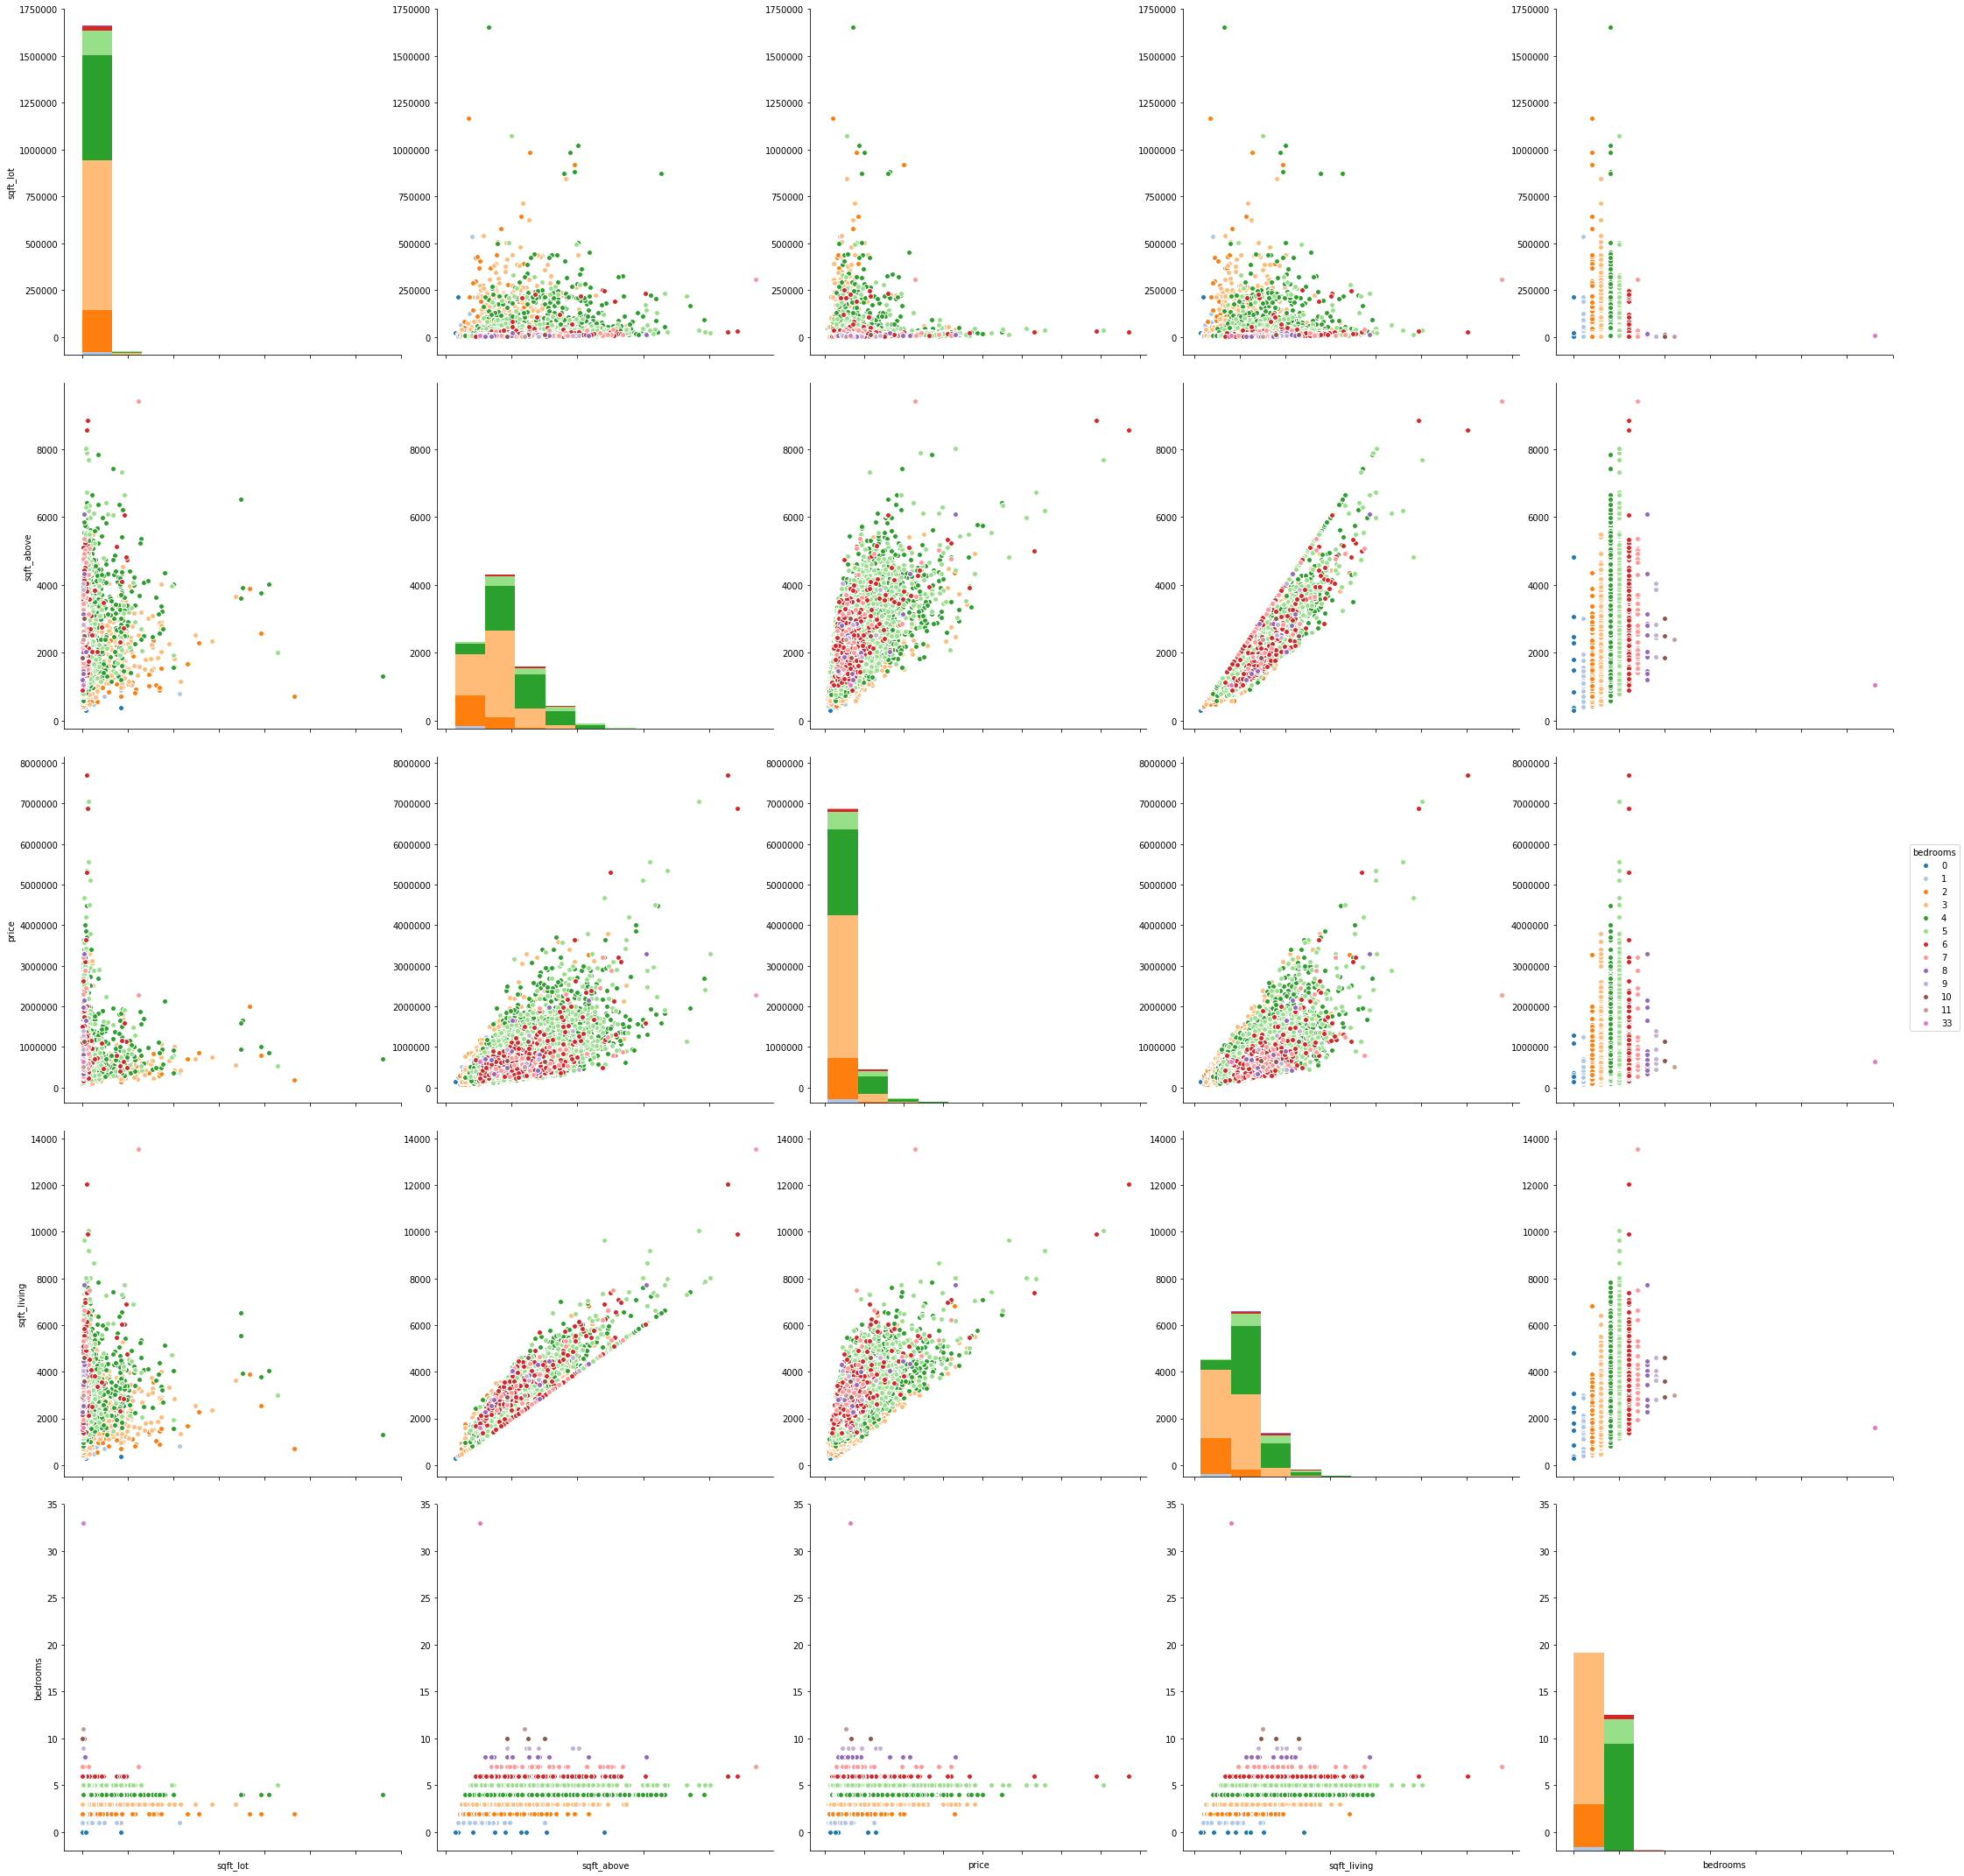

In [14]:
g = sns.pairplot(data[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [293]:
data.corr()
data = data.drop(['id','date'], axis = 1, errors = 'ignore')
data.sqft_basement

0           0
1         400
2           0
3         910
4           0
5        1530
6           0
7           0
8         730
9           0
10       1700
11        300
12          0
13          0
14          0
15        970
16          0
17          0
18          0
19          0
20        760
21        720
22          0
23          0
24          0
25          0
26        700
27          0
28        730
29          0
         ... 
21583       0
21584     320
21585       0
21586       0
21587       0
21588     190
21589       0
21590    1800
21591       0
21592       0
21593       0
21594       0
21595      50
21596       0
21597       0
21598       0
21599       0
21600       0
21601       0
21602       0
21603       0
21604       0
21605       0
21606     910
21607     130
21608       0
21609       0
21610       0
21611       0
21612       0
Name: sqft_basement, Length: 21613, dtype: int64

In [23]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
print(str_list)            

['date']


In [25]:
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list)

In [9]:
num_list

Index(['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'id', 'lat',
       'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront',
       'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [16]:
house_num = data[num_list]
house_num.hea

,bathrooms,bedrooms,condition,floors,grade,id,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
0,1.00,3,3,1.0,7,7129300520,47.5112,-122.257,221900.0,1180,0,1180,1340,5650,5650,0,0,1955,0,98178
1,2.25,3,3,2.0,7,6414100192,47.7210,-122.319,538000.0,2170,400,2570,1690,7242,7639,0,0,1951,1991,98125
2,1.00,2,3,1.0,6,5631500400,47.7379,-122.233,180000.0,770,0,770,2720,10000,8062,0,0,1933,0,98028
3,3.00,4,5,1.0,7,2487200875,47.5208,-122.393,604000.0,1050,910,1960,1360,5000,5000,0,0,1965,0,98136
4,2.00,3,3,1.0,8,1954400510,47.6168,-122.045,510000.0,1680,0,1680,1800,8080,7503,0,0,1987,0,98074


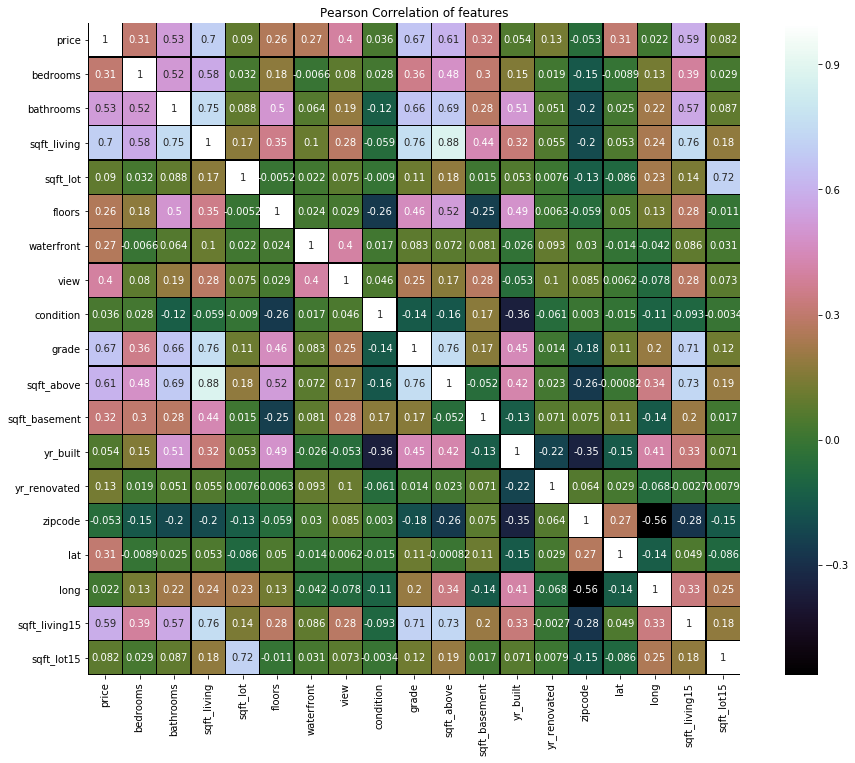

In [68]:
f, ax = plt.subplots(figsize = (16,12))
plt.title('Pearson Correlation of features')
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True,
#            cmap="cubehelix", linecolor='k', annot=True)
sns.heatmap(data.corr() , linewidth = 0.5, vmax = 1.0, square = True, cmap="cubehelix", linecolor = "k", annot = True)

In [466]:
data['LogSqft_living'] = np.log(data.sqft_living)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id                21613 non-null int64
date              21613 non-null object
price             21613 non-null float64
bedrooms          21613 non-null int64
bathrooms         21613 non-null float64
sqft_living       21613 non-null int64
sqft_lot          21613 non-null int64
floors            21613 non-null float64
waterfront        21613 non-null int64
view              21613 non-null int64
condition         21613 non-null int64
grade             21613 non-null int64
sqft_above        21613 non-null int64
sqft_basement     21613 non-null int64
yr_built          21613 non-null int64
yr_renovated      21613 non-null int64
zipcode           21613 non-null int64
lat               21613 non-null float64
long              21613 non-null float64
sqft_living15     21613 non-null int64
sqft_lot15        21613 non-null int64
LogSqft_living    21613 non-null float64
dtypes: float64(6), 

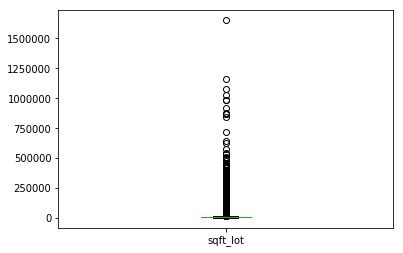

In [316]:
data.sqft_lot.plot(kind = 'box')

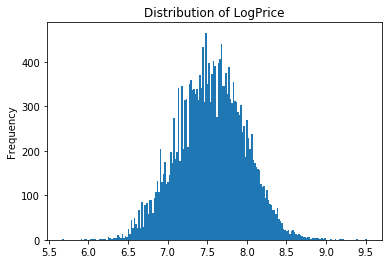

In [259]:
data.LogSqft_living.plot(kind = 'hist', bins = 200, title = 'Distribution of LogPrice')

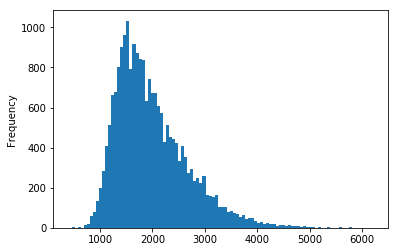

In [181]:
data.sqft_living.plot(kind = 'hist', bins =100)

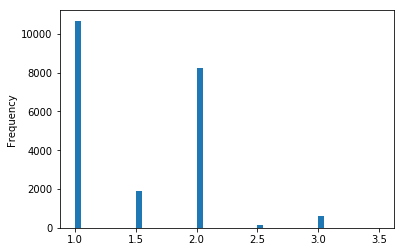

In [39]:
data.floors.plot(kind = 'hist', bins =50)

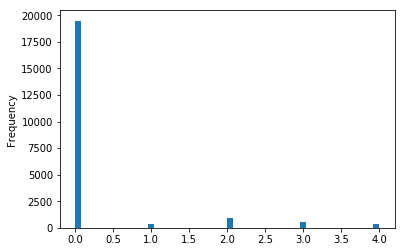

In [41]:
data.view.plot(kind = 'hist', bins =50)

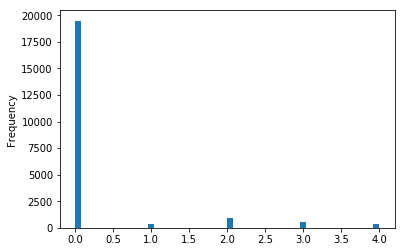

In [56]:
data.view.plot(kind = 'hist', bins =50)

In [76]:
# First extract the target variable which is our House prices
Y = data.price.values
# Drop price from the house dataframe and create a matrix out of the house data
house = data.drop(['price'], axis=1)
X = house.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = data.columns

In [197]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Now Selecting 80% of data as sample from total 'n' rows of the data 

In [467]:
from sklearn.cross_validation import train_test_split

In [468]:
train, test = train_test_split(data, train_size=0.80, random_state=1)

In [469]:
test.shape

(4323, 22)

In [470]:
import statsmodels.api as sm

In [471]:
import statsmodels.formula.api as smf

In [576]:
model1 = smf.ols('np.log(price) ~ np.log(sqft_living) + bathrooms + bedrooms + view + C(grade) + lat + '
                 'C(zipcode) + C(condition) + C(waterfront)', data=train)

In [577]:
fit1 = model1.fit()

In [578]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1312.
Date:                Sun, 12 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:32:24   Log-Likelihood:                 4388.9
No. Observations:               17290   AIC:                            -8598.
Df Residuals:                   17200   BIC:                            -7900.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -18.0608      3.921     -4.606      0.000     -25.746     -10.376
C(grade)[T.4]          -0.0828      0.115     -0.717      0.473      -0.309       0.143
C(grade)[T.5]          -0.1164      0.110     -1.057      0.291      -0.332       0.100
C(grade)[T.6]          -0.0601      0.109     -0.549      0.583      -0.275       0.154
C(grade)[T.7]          -0.0045      0.109     -0.041      0.967      -0.219       0.210
C(grade)[T.8]           0.0853      0.110      0.779      0.436      -0.129       0.300
C(grade)[T.9]           0.2330      0.110      2.123      0.034       0.018       0.448
C(grade)[T.10]          0.3489      0.110      3.174      0.002       0.133       0.564
C(grade)[T.11]          0.4711      0.110      4.266      0.000       0.255       0.688
C(grade)[T.12]          0.6073      0.112      5.401      0.000       0.387       0.828
C(grade)[T.13]          0.8911      0.129      6.910      0.000       0.638       1.144
C(zipcode)[T.98002]    -0.0408      0.018     -2.208      0.027      -0.077      -0.005
C(zipcode)[T.98003]     0.0212      0.017      1.264      0.206      -0.012       0.054
C(zipcode)[T.98004]     0.9672      0.030     32.015      0.000       0.908       1.026
C(zipcode)[T.98005]     0.5808      0.032     18.122      0.000       0.518       0.644
C(zipcode)[T.98006]     0.5095      0.025     20.048      0.000       0.460       0.559
C(zipcode)[T.98007]     0.4767      0.033     14.510      0.000       0.412       0.541
C(zipcode)[T.98008]     0.4834      0.030     15.980      0.000       0.424       0.543
C(zipcode)[T.98010]     0.2633      0.025     10.728      0.000       0.215       0.311
C(zipcode)[T.98011]     0.2122      0.041      5.142      0.000       0.131       0.293
C(zipcode)[T.98014]     0.1584      0.037      4.269      0.000       0.086       0.231
C(zipcode)[T.98019]     0.1032      0.040      2.584      0.010       0.025       0.181
C(zipcode)[T.98022]     0.1375      0.019      7.102      0.000       0.100       0.175
C(zipcode)[T.98023]    -0.0353      0.015     -2.405      0.016      -0.064      -0.007
C(zipcode)[T.98024]     0.3840      0.034     11.283      0.000       0.317       0.451
C(zipcode)[T.98027]     0.4059      0.023     17.524      0.000       0.360       0.451
C(zipcode)[T.98028]     0.1795      0.040      4.433      0.000       0.100       0.259
C(zipcode)[T.98029]     0.4520      0.026     17.163      0.000       0.400       0.504
C(zipcode)[T.98030]     0.0205      0.018      1.146      0.252      -0.015       0.056
C(zipcode)[T.98031]     0.0245      0.019      1.317      0.188      -0.012       0.061
C(zipcode)[T.98032]    -0.0617      0.022     -2.772      0.006      -0.105      -0.018
C(zipcode)[T.98033]     0.5889      0.034     17.201      0.000       0.522       0.656
C(z

### 1. Residual plot

First plot that’s generated by plot() in R is the residual plot, which draws a scatterplot of fitted values against residuals, with a “locally weighted scatterplot smoothing (lowess)” regression line showing any apparent trend.
This one can be easily plotted using seaborn residplot with fitted values as x parameter, and the dependent variable as y. lowess=True makes sure the lowess regression line is drawn. Additional parameters are passed to underlying matplotlib scatter and line functions using scatter_kws and line_kws, also titles and labels are set using matplotlib methods. The ; in the end gets rid of the output text <matplotlib.text.Text at 0x000000000> at the top of the plot 1. Top 3 absolute residuals are also annotated:

In [493]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [515]:
# fitted values (need a constant term for intercept)
model_fitted_y = fit1.fittedvalues

In [514]:
# model residuals
model_residuals = fit1.resid

Text(0,0.5,'Residuals')

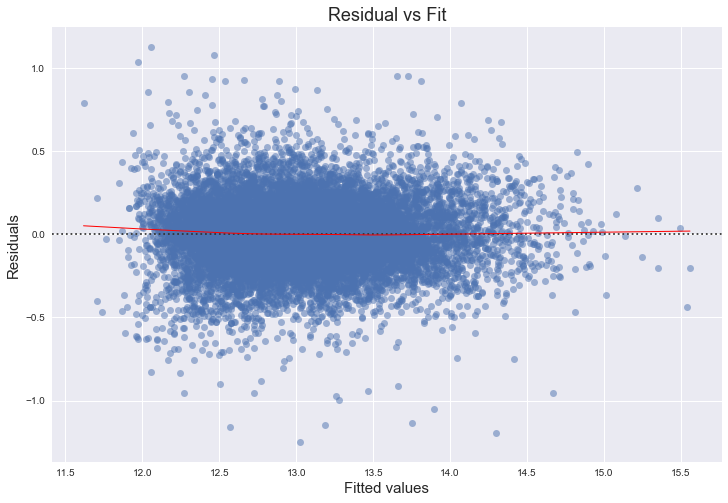

In [538]:
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

#size of the grpah
plot1 = plt.figure(1)
plot1.set_figheight(8)
plot1.set_figwidth(12)

plot1.axes[0] = sns.residplot(model_fitted_y, model_residuals, 
                      lowess=True, data=train,
                      scatter_kws={'alpha': 0.5},
                      line_kws={'color': 'red', 'lw': 1})
#legends
plot1.axes[0].set_title('Residual vs Fit')
plot1.axes[0].set_xlabel('Fitted values')
plot1.axes[0].set_ylabel('Residuals')     

In [540]:
# normalized residuals
model_norm_residuals = fit1.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fit1.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fit1.get_influence().cooks_distance[0]

### 2. QQ plot

This one shows how well the distribution of residuals fit the normal distribution. This plots the standardized (z-score) residuals against the theoretical normal quantiles. Anything quite off the diagonal lines may be a concern for further investigation.
For this, I’m using ProbPlot and its qqplot method from statsmodels graphics API. statsmodels actually has a qqplot method that we can use directly, but it’s not very customizable, hence this two-step approach. 

In [562]:
from statsmodels.graphics.gofplots import ProbPlot

In [566]:
QQ = ProbPlot(model_norm_residuals)

Text(0,0.5,'Standardized Residuals')

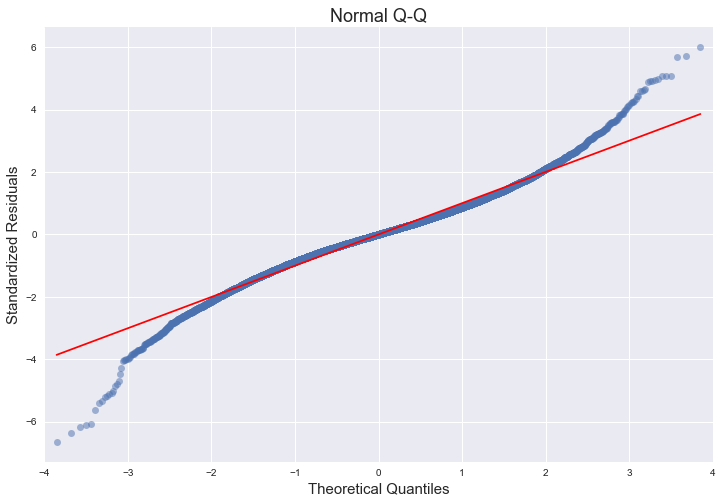

In [573]:
plot_lm_2 = QQ.qqplot(line='s', alpha=0.5, color='#4C72B0', lw=1)

#size of the graph
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

#Setting the legends
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

If a set of observation are approximately normally distributed, the normal Q-Q plot would result in approximately straight line

### Fat tails Interpretation
The plot shows a dataset with “fat tails,” meaning that compared to the normal distribution there is more data located at the extremes of the distribution and less data in the center of the distribution. In terms of quantiles this means that the first quantile is much less than the first theoretical quantile and the last quantile is greater than the last theoretical quantile.

In other words, larger values are larger (more extreme) than the expected values and the smaller values(at the bottom) are smaller than expected.